In [4]:
 %reload_kedro

[10/27/24 19:42:32] INFO     Resolved project path as: E:\Lab Files\Repos\rohith-ai-839.            ]8;id=724645;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=166635;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py#175\175]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=478774;file://C:\Python310\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=144559;file://C:\Python310\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#62\62]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=333212;file://C:\Python310\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=628530;file://C:\Python310\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///E:/Lab%20Files/Repos/rohith-ai-839/mlruns'                                   

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=39943;file://C:\Python310\lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=419817;file://C:\Python310\lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/27/24 19:42:34] INFO     Kedro project rohith_ai_839                                            ]8;id=809070;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=494453;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=863455;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=125935;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[10/27/24 19:42:36] INFO     Registered line magic 'run_viz'                                        ]8;id=968854;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=655460;file://C:\Python310\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [5]:
catalog.datasets


{'metrics': "kedro_datasets.tracking.metrics_dataset.MetricsDataset(filepath=PurePosixPath('E:/Lab "
            "Files/Repos/rohith-ai-839/data/07_model_output/metrics.json'), "
            "protocol='file', save_args={'indent': 2}, "
            "version=Version(load=None, save='2024-10-27T14.12.32.925Z'))",
 'data_drift': "kedro_datasets.json.json_dataset.JSONDataset(filepath=PurePosixPath('E:/Lab "
               "Files/Repos/rohith-ai-839/data/07_model_output/data_drift.json'), "
               "protocol='file', save_args={'indent': 2}, "
               "version=Version(load=None, save='2024-10-27T14.12.32.925Z'))",
 'pred_drift': "kedro_datasets.json.json_dataset.JSONDataset(filepath=PurePosixPath('E:/Lab "
               "Files/Repos/rohith-ai-839/data/07_model_output/pred_drift.json'), "
               "protocol='file', save_args={'indent': 2}, "
               "version=Version(load=None, save='2024-10-27T14.12.32.925Z'))",
 'dummy_confusion_matrix': "kedro_datasets.matplotlib

In [6]:


d=catalog.load("model_input_dataset")



[10/27/24 19:42:37] INFO     Loading data from model_input_dataset (CSVDataset)...              ]8;id=953529;file://C:\Python310\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=347723;file://C:\Python310\lib\site-packages\kedro\io\data_catalog.py#537\537]8;;\

In [8]:
p = catalog.load("parameters")


[10/27/24 19:42:43] INFO     Loading data from parameters (MemoryDataset)...                    ]8;id=191470;file://C:\Python310\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=497713;file://C:\Python310\lib\site-packages\kedro\io\data_catalog.py#537\537]8;;\

In [9]:
from sklearn.model_selection import train_test_split
X = d[p["model_options"]["features"]]
y = d["y"]
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=p["model_options"]["test_size"], random_state=p["model_options"]["random_state"]
    )

In [ ]:
from sklearn.linear_model import LogisticRegression

In [8]:
regressor = LogisticRegression(penalty="l2", C=0.01)
regressor.fit(X_train, y_train)

[09/29/24 21:35:50] WARNING  C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469:  ]8;id=568526;file://C:\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=794357;file://C:\Python310\lib\warnings.py#109\109]8;;\
                             ConvergenceWarning: lbfgs failed to converge (status=1):                              
                             STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.                                          
                                                                                                                   
                             Increase the number of iterations (max_iter) or scale the data as                     
                             shown in:                                                                             
                                 https://scikit-learn.org/stable/modules/preprocessing.html                        
                             Please also refer to the documentation for alternative solver options:                
                                 https://scikit-learn.org/stable/modules/linear_model.html#logistic                
                             -regression                                                                           
                               n_iter_i = _check_optimize_result(                                                  
                                                                                                                   

LogisticRegression(C=0.01)

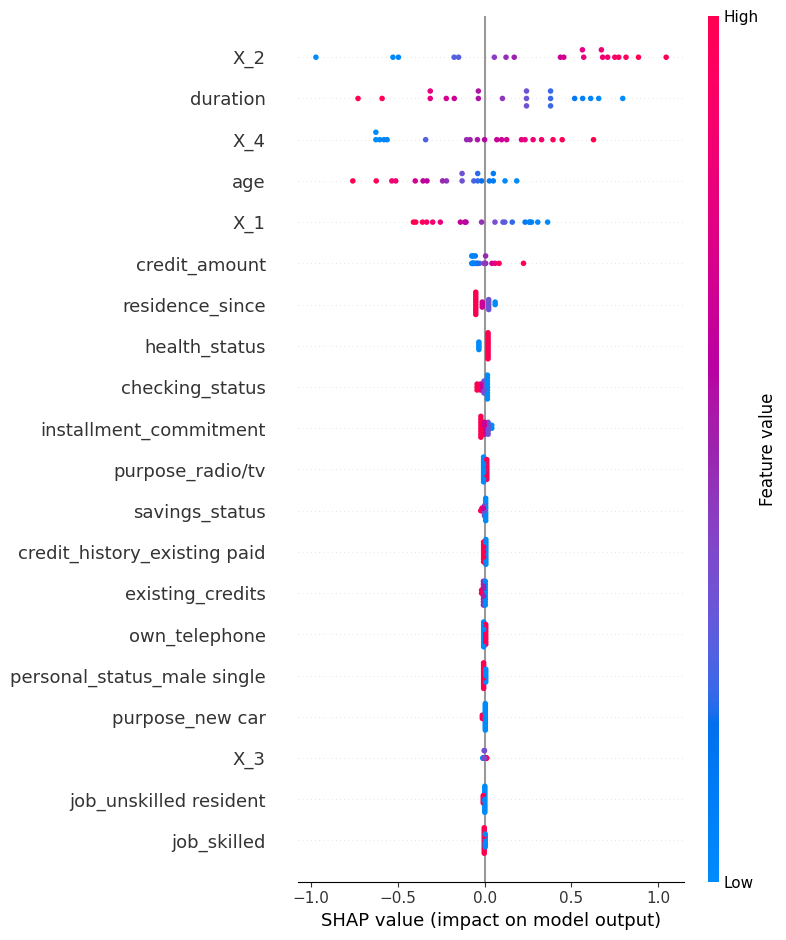

In [9]:
import shap
explainer = shap.Explainer(regressor, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

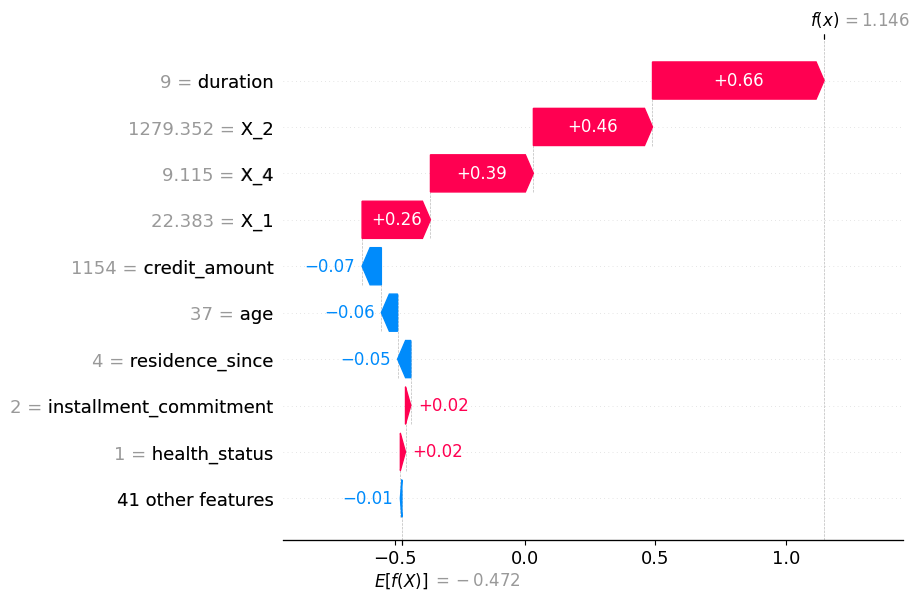

In [18]:
shap.waterfall_plot(shap_values[5])

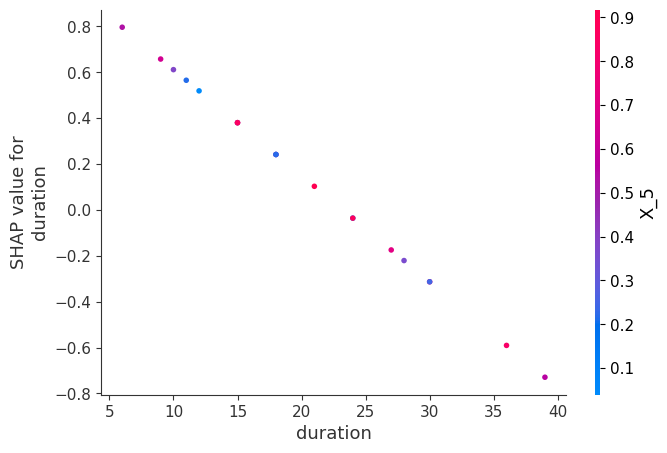

In [19]:

shap.dependence_plot("duration", shap_values.values, X_test)

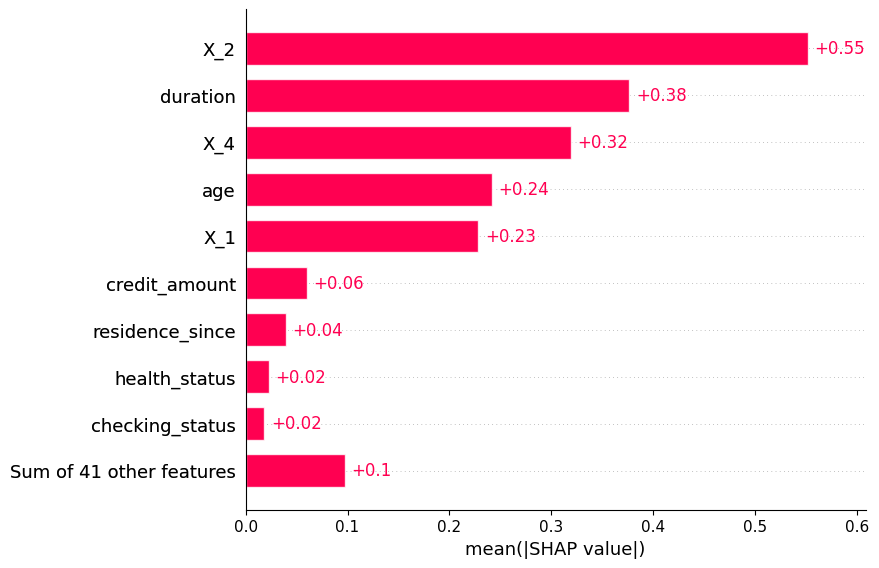

In [33]:
shap.plots.bar(shap_values)

In [6]:
p["model_options"]["features"]


[
    'checking_status',
    'duration',
    'credit_amount',
    'savings_status',
    'employment',
    'installment_commitment',
    'residence_since',
    'age',
    'existing_credits',
    'num_dependents',
    'own_telephone',
    'foreign_worker',
    'health_status',
    'X_1',
    'X_2',
    'X_3',
    'X_4',
    'X_5',
    'X_6',
    'X_7',
    'X_8',
    'X_9',
    'X_10',
    'purpose_domestic appliance',
    'purpose_education',
    'purpose_furniture/equipment',
    'purpose_new car',
    'purpose_other',
    'purpose_radio/tv',
    'purpose_repairs',
    'purpose_used car',
    'credit_history_critical/other existing credit',
    'credit_history_delayed previously',
    'credit_history_existing paid',
    'credit_history_no credits/all paid',
    'personal_status_male div/sep',
    'personal_status_male mar/wid',
    'personal_status_male single',
    'housing_own',
    'housing_rent',
    'job_skilled',
    'job_unemp/unskilled non res',
    'job_unskilled resident',
 

In [10]:
X_test

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,...,job_skilled,job_unemp/unskilled non res,job_unskilled resident,other_payment_plans_none,other_payment_plans_stores,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_parties_guarantor,other_parties_none
93,0,30,1867.0,1,1,4,4,58,1,1,...,1,0,0,1,0,0,0,0,0,1
67,2,27,5293.0,0,4,2,4,50,2,1,...,1,0,0,0,1,1,0,0,0,1
6,0,11,1154.0,2,4,4,4,57,3,1,...,0,0,1,1,0,0,0,1,0,1
64,2,10,2315.0,0,1,3,4,52,1,1,...,0,0,1,1,0,0,0,1,0,1
96,1,36,3990.0,1,3,3,2,29,1,1,...,0,1,0,0,0,0,1,0,0,1
83,1,9,1154.0,0,1,2,4,37,3,1,...,0,0,1,1,0,0,0,1,0,1
98,3,30,3656.0,1,1,4,4,49,2,1,...,0,0,1,0,1,1,0,0,0,1
42,2,28,4006.0,0,0,3,2,45,1,1,...,0,0,1,1,0,0,0,0,0,1
25,3,15,1905.0,0,1,4,4,40,1,1,...,0,0,0,1,0,0,0,0,0,1
15,1,39,11760.0,2,2,2,3,32,1,1,...,1,0,0,1,0,0,1,0,0,1


In [8]:
list(X_test.values[0])


[
    0.0,
    30.0,
    1867.0,
    1.0,
    1.0,
    4.0,
    4.0,
    58.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    62.79074490439901,
    1017.3235927025388,
    0.1803806481217913,
    1.0574027524516618,
    0.2475585715886191,
    0.1545127479420409,
    0.7359367162038442,
    0.8627848081065671,
    0.4639538237249271,
    0.0630213184105249,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    1.0,
    1.0,
    0.0,
    1.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0
]

In [43]:
import requests
import json

url = 'http://127.0.0.1:5000/update_preds'

response = requests.get(url)
print(response.json())

{'message': 'Predictions updated successfully!'}


In [34]:
import requests
import json

# URL for the MLflow model server
#url = 'http://127.0.0.1:8001/invocations'
url = 'http://127.0.0.1:5000/'

# Define the input data
data = {
    "instances": [list(X_test.values[6])]
}

# Send the POST request
response = requests.post(url, headers={"Content-Type": "application/json"}, data=json.dumps(data))

# Print the prediction response
print(response.json())

{'data': {'predictions': [False]}, 'message': 'Prediction Done! Your Prediction has been logged in the server'}


In [47]:
import requests
import json

url = 'http://127.0.0.1:5000/erase?records=5'

response = requests.get(url)
print(response.json())

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Python310\lib\site-packages\urllib3\connectionpool.py:789 in urlopen                          │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\connectionpool.py:536 in _make_request                    │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\connection.py:464 in getresponse                          │
│                                                                                                  │
│ C:\Python310\lib\http\client.py:1374 in getresponse                                              │
│                                                                                                  │
│ C:\Python310\lib\http\client.py:318 in begin                                                     │
│                                                                                                  │
│ C:\Python310\lib\http\client.py:279 in _read_status                                              │
│                                                                                                  │
│ C:\Python310\lib\socket.py:705 in readinto                                                       │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Python310\lib\site-packages\requests\adapters.py:667 in send                                  │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\connectionpool.py:843 in urlopen                          │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\util\retry.py:474 in increment                            │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\util\util.py:38 in reraise                                │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\connectionpool.py:789 in urlopen                          │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\connectionpool.py:536 in _make_request                    │
│                                                                                                  │
│ C:\Python310\lib\site-packages\urllib3\connection.py:464 in getresponse                          │
│                                                                                                  │
│ C:\Python310\lib\http\client.py:1374 in getresponse                                              │
│                                                                                                  │
│ C:\Python310\lib\http\client.py:318 in begin                                                     │
│                                                                                                  │
│ C:\Python310\lib\http\client.py:279 in _read_status                                              │
│                                                                                                  │
│ C:\Python310\lib\socket.py:705 in readinto                                                       │
╰───────────────────────────────────────────────────────────────────────────────────────────